## Data Science & Business Analysis Intern - April 2023

**Task 1: Prediction Using Supervised Machine Learning**

The task is to predict the performance of a student based on the number of his/her study hours using linear regression

## Steps:

1)Importing the dataset 
2)Data Visualization 
3)Dividing the data 
4)Data Training 
5)Model Visualization 
6)Applying Predictions 
7)Model Evaluation

**Author: Soham Goswami**

## Step 1: Importing the dataset

In [1]:
# importing the needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading the data from a csv file using pandas library
url_path = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
studentScores = pd.read_csv(url_path)
print("Data imported successfully")

Data imported successfully


In [3]:
# to view the first 5 entries 
studentScores.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
# to observe the number of rows and columns
studentScores.shape

(25, 2)

In [5]:
# to observe column names
studentScores.columns

Index(['Hours', 'Scores'], dtype='object')

In [6]:
# to observe their data types
studentScores.dtypes

Hours     float64
Scores      int64
dtype: object

In [7]:
# to know more information about the dataset
studentScores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
# to observe more statistical information as mean, standard deviation, min, max and quartiles
studentScores.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
# to check if our dataset contains null values
studentScores.isnull().sum()

Hours     0
Scores    0
dtype: int64

## Step 2: Data Visualization

Plotting the dataset to view whether the variables maintain a relationship between them or not

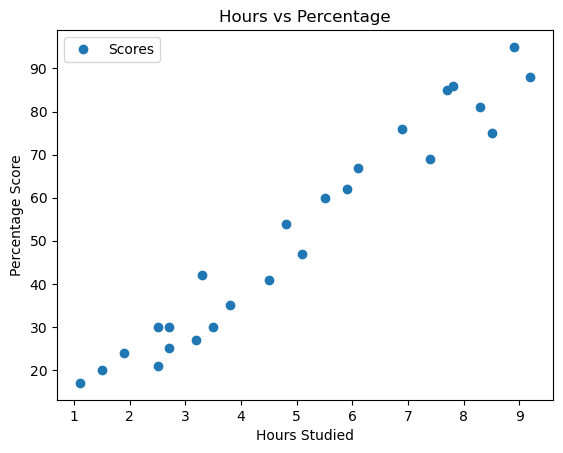

In [10]:
#Plotting the dataset using matplotlib library
# style is how the points are shaped on the graph
studentScores.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.show()

From the graph above, we can deduce that there is a linear relationship between "Hours studied" and "Percentage Score". Thus, we can use linear regression supervised machine learning model to predict future results

In [11]:
# to view the correlation between the variables
studentScores.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


For every 1 hour, score is 0.98 which means that there is a strong positive correlation between the variables

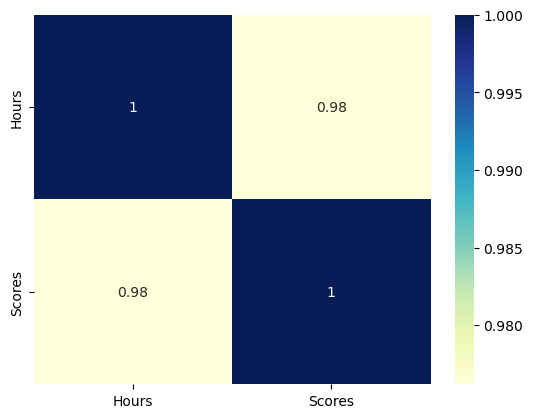

In [13]:
# to view a correlation graph
corr_graph = sns.heatmap(studentScores.corr(), cmap="YlGnBu", annot=True)
  
plt.show()

## Step 3: Dividing the data

In this step, we will divide the data into two parts (training and testing)

In [14]:
#using iloc function we will separate the columns
X = studentScores.iloc[:, :1].values  
Y = studentScores.iloc[:, 1].values

X will be saving the values of the first column which is "hours" and Y will be saving the values of the second column which is "scores"

In [15]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [16]:
Y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

In [17]:
# splitting the data into training and testing data
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

This means that data is divided with a portion of 80% training data and 20% testing data

Random state=0 means that data will be picked randomly from the dataset

## Step 4: Data Training

In this step, we will be applying linear regression model on the training data we have obtained

In [18]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, Y_train) 

print("Training complete.")

Training complete.


## Step 5: Model Visualization

Visualizing the model after training

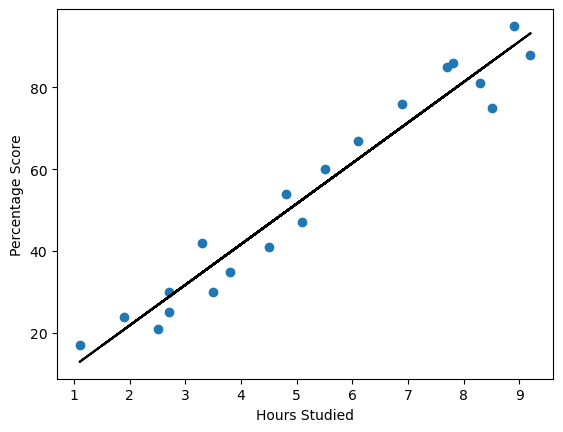

In [19]:
# m --> slope of the line 
m = regressor.coef_

# c --> intercept of the line
c = regressor.intercept_

# to model the best-fit line
line = m*X + c

# Plotting the training data using matplotlib.pyplot library
plt.scatter(X_train, Y_train)
plt.plot(X, line, color= 'black');

# to label the axis
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

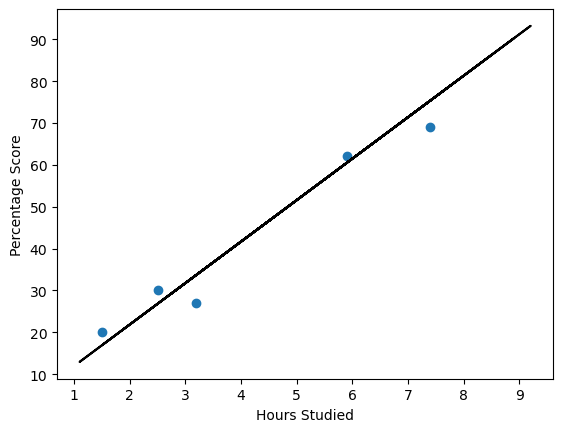

In [20]:
# Plotting the testing data using matplotlib.pyplot library
plt.scatter(X_test, Y_test)
plt.plot(X, line, color= 'black');

# to label the axis
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

## Step 6: Applying Prediction

Now it's time to make some predictions

In [21]:
# Printing the testing data (Hours)
print(X_test) 

#Predicting the Scores 
Y_pred = regressor.predict(X_test) 

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [22]:
#Printing the testing data (Scores)
Y_test

array([20, 27, 69, 30, 62])

In [23]:
#Printing the predicted data (Scores)
Y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [24]:
#Comparing Actual Vs Predicted using pandas library

compare = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred}) 

#printing 'compare'
compare

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


**Applying Prediction Model using 9.25 hours/day**

In [25]:
hours = 9.25
predicted_Score = regressor.predict([[hours]])

In [26]:
print ("The predicted score if a student studies",hours, "hours per day is:", predicted_Score[0])

The predicted score if a student studies 9.25 hours per day is: 93.69173248737539


## Step 7: Model Evaluation

In conclusion, we will evaluate our model using mean absolute error

In [27]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))

Mean Absolute Error: 4.183859899002982
